In [ ]:
# CHAPTER 1 - language Processing & Python


In [128]:
# Packages
import nltk
import matplotlib.pyplot as plt
import os
import re
import pandas as pd

In [ ]:
# Home Made Functions

def word_count(text):
    Dict = {}
    Unique_words = set(text)
    for x in Unique_words:
        Count = text.count(x)
        Dict[x] = Count
    return Dict

In [4]:
# Load Corpora

from nltk.book import*

# reference texts 'text1, text2, text9

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
# Find Word Within Context

'''Concordance
Definition      Shows every plan the word appears in the text along with accompanying text on both sides of its position. 
'''

# Moby Dick
Concordance_monstrous = text1.concordance('monstrous')

# Wall Stree Journal
Concordance_fraud= text7.concordance('fraud')


Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u
Displaying 2 of 2 matches:
the neighbors are suing for consumer fraud . '' And the nose on 

In [16]:
# Find Words Within Similar Context

text1.similar('monstrous')

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [18]:
# Find Context Shared By Two Words


text2.common_contexts(['monstrous', 'very'])


a_pretty am_glad a_lucky is_pretty be_glad


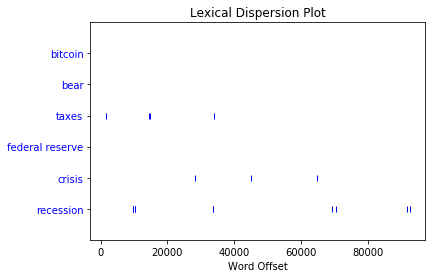

In [24]:
# Lexical Dispersion Plot

text7.dispersion_plot(['bitcoin', 'bear', 'taxes', 'federal reserve', 'crisis', 'recession'])

In [45]:
# Generate Random Text

'''Method is broken.  Cant use'''
     

'Method is broken.  Cant use'

In [16]:
# Get Vocabular 

import string
Unique_words = set(text3)



In [21]:
# Lexical Richness 

Num_words = len(text3)
Num_vocab = len(set(text3))

Lexical_richness = Num_words / Num_vocab

# print(Lexical_richness)
# On average each word is used 16 times. 

In [26]:
# Word Count

Count_smote = text3.count('smote'
Perc_text_smote = 100 * (Count_smote / len(text3))
#print(Perc_text_smote)


0.01116968992940756


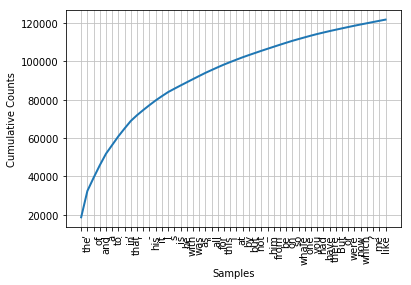

None


In [64]:
# Computing with Language - Simple Statistics

# 1. Frquency Distribution (Top 50)

fdistr_1 = FreqDist(text1)    
vocabulary_1 = fdistr_1.keys()      # All distict words
vocab_count = fdistr_1.elements     # Will return each vocab or token and its frequency in the text. 

#print(fdistr_1.plot(50, cumulative = True))


In [ ]:
# Hapaxes - Words that occur only once

In [65]:
fdistr_1.hapaxes

<bound method FreqDist.hapaxes of FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})>

In [82]:
# Long Words

#Long_words = [print(x) for x in text4 if len(x) > 15]

In [97]:
# Long & Frequent Words

#Long_frequ_words = [print(x) for x in text1 if len(x) > 12 and fdistr_1[x] > 10]


In [99]:
# Collocations & Bigrams

'''Definitions

Collocation     sequence of words that occur togetehr unusually often and reistant to substitut coion (red wine vs maroon wine)
Birgrams        sequence of two word collocations. 

Objective       find birgrams that occur more often than we would expect based on the frequency of indv words. 
collocation()   function for finding bigrams. 
Question        How do you search for a specific group of words, bigram or trigram?

'''

#text4.collocations()


United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


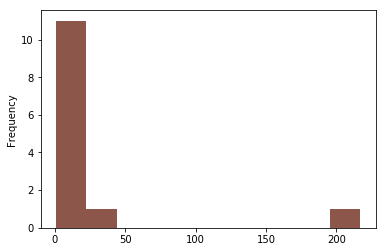

In [146]:
# Frequency Distribution

'''Approach using pure python

Get count for each unique word (use the dictionary method. 
Convert to a dataframe
Group the dataframe based on the frequencies.
This should result in a frequency distribution for each frequency
)

'''

# Import Articles

chdir = os.chdir(r'C:\Users\Chris.Cirelli\Desktop\Python Programing Docs\Learn Python\11. Web Scraping with Python\EEOC Articles')
Get_cdw = os.getcwd()
File_name_list = os.listdir()
def get_Dir_list(File):
        List = []
        for x in File:    
            if 'txt' in x:                                    # Confirm a txt file
                y = Get_cdw + '\\' + x  
                List.append(y)
        return List
Dir_list = get_Dir_list(File_name_list)

Text = open(Dir_list[1]).read()

def Frequency_Distriubtion(Text):
    Dict = {}
    
    Text = str(Text)
    
    Split_text = Text.split(' ')
    for x in Split_text:
        if x in Dict.keys():
            Dict[x] = Dict[x] + 1
        else:
            Dict[x] = 1
    
    # Create Dataframe
    
    df = pd.DataFrame(Dict, index = [1])
    df_tran = pd.DataFrame.transpose(df)
    
    # Group on Count
    
    Group = df_tran.groupby(1)[1].count()
    Historgram = Group.plot.hist()
    Plot = Historgram.figure
    
    return Plot


Frequency_Distriubtion(Text)

